<a href="https://colab.research.google.com/github/cfcastillo/DS-stamp-prices/blob/main/Project_1_Notebook_cfc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Definition

The purpose of this project is to predict whether or not a future customer will make a transaction based on their historical transaction data. This is a supervised binary classification problem because the results predict if a customer will or will not buy something in the future based on their past purchase history. 

The project requirements state that this analysis should use Gaussian Naive Bayes classification. The first part of the project analyzed the data to see if the data met the requirements for a Gaussian Naive Bayes Classification problem:
1. Predictor variables are normally distributed
1. Predictor variables are independent showing low correlation.
Once the data was deemed suitable for a Gaussian Naive Bayes classification, then models using training and testing subsets were derived using both skewed and even subsets.

[TODO] finish problem definition

# Data Collection/Sources

Data was provided by the instructor in a single comma-delimited text file called Train.csv located on a Google Drive.


## Imports

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.metrics import classification_report
import sklearn.model_selection as model_selection

## Load Data


In [118]:
# Mount Drive
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [119]:
# Load Data
train_path = '/drive/My Drive/Cohort_6/Projects/Project 1/Data/Train.csv'
train_data = pd.read_csv(train_path)

# Data Cleaning and Inspection

Columns that were not predictor columns were dropped. The target column contained the expected values of 1 and 0 and no nulls wer present. So no further data cleaning was necessary.

In [120]:
# Examine sample data to understand data set
train_data.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,2.5791,-5.1488,16.8911,11.1920,-5.2387,11.6418,5.1736,22.4321,-2.3440,6.5199,13.6468,13.8372,9.3225,11.0924,14.8421,-3.4132,14.1104,24.3627,2.0323,1.5093,0.8897,6.5674,15.6599,11.5659,-16.4727,4.0288,17.9244,10.4838,6.6760,12.6644,2.7004,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,8.5524,-11.7684,19.3710,11.3702,-11.1147,1.2444,6.6885,7.9344,3.2709,5.5075,2.5462,18.1782,-13.5901,8.0905,11.7569,0.6939,13.9550,13.0858,6.6203,4.1569,8.2736,7.0513,16.1622,8.9231,11.7700,4.2578,-4.4223,-0.5687,-5.0121,15.1345,3.2003,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,1.2145,-7.9940,19.0422,11.0449,-13.5174,4.1006,6.4059,9.8565,4.5048,6.3191,7.4729,15.7811,-4.4577,14.1613,14.2621,-0.0269,14.1963,20.3882,3.2304,2.9044,2.7768,6.6231,8.6674,11.4934,1.7624,4.0714,-1.2681,-5.1747,-1.0410,20.5092,3.2790,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,6.8202,0.8135,6.1796,10.6093,-3.8294,8.0485,5.2091,23.6143,11.6875,4.0806,0.7839,10.5404,-2.3174,14.4027,7.2887,1.9480,14.3256,14.4135,4.2827,-2.5459,3.9618,7.1954,8.9821,10.4994,4.1622,3.7613,2.3701,17.0336,-11.0882,17.2502,2.5881,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,10.1102,3.1736,19.3239,12.4057,-5.5963,6.9087,5.7555,1.6184,1.0273,7.1734,2.9598,13.3317,7.0799,9.3627,14.0553,0.6715,14.0837,28.2749,-0.1937,-3.6135,5.2964,6.6173,13.9547,11.5670,-12.7047,3.7574,9.9110,4.7022,6.5769,21.2607,3.2304,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [121]:
# Drop unnecessary columns
train_data.drop(train_data.columns[0], axis=1, inplace=True)
train_data.drop('ID_code', axis=1, inplace=True)

In [122]:
# Any Nulls?
val = train_data.isnull().sum().sum()
# if any null data is found, print out nulls by column to find where 
if val > 0:
  print(train_data.isnull().sum())
else:
  print("No null data found.")


No null data found.


The target column was evaluated to confirm that all values were either a zero or a one. During this evaluation, it was observed that most data has a target value of 0 indicating a bias in the data toward no transaction.

In [123]:
# Confirm veracity of target column. Values of 0 and 1 are expected.
train_data['target'].value_counts()

0    161960
1     18040
Name: target, dtype: int64

In [124]:
train_data.info()
# no nulls. All floats. 180,000 rows. 50 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   target  180000 non-null  int64  
 1   var_0   180000 non-null  float64
 2   var_1   180000 non-null  float64
 3   var_2   180000 non-null  float64
 4   var_3   180000 non-null  float64
 5   var_4   180000 non-null  float64
 6   var_5   180000 non-null  float64
 7   var_6   180000 non-null  float64
 8   var_7   180000 non-null  float64
 9   var_8   180000 non-null  float64
 10  var_9   180000 non-null  float64
 11  var_10  180000 non-null  float64
 12  var_11  180000 non-null  float64
 13  var_12  180000 non-null  float64
 14  var_13  180000 non-null  float64
 15  var_14  180000 non-null  float64
 16  var_15  180000 non-null  float64
 17  var_16  180000 non-null  float64
 18  var_17  180000 non-null  float64
 19  var_18  180000 non-null  float64
 20  var_19  180000 non-null  float64
 21  var_20  18

In [125]:
train_data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.00000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,0.100222,10.678650,-1.630045,10.712922,5.408688,7.566953,14.024017,8.52808,15.243424,17.264876,4.306171,-4.046449,14.777153,11.434945,-6.727860,8.942328,6.007784,11.946357,6.051401,5.347539,5.799587,14.721236,5.621549,12.735619,10.996891,-0.746871,14.224538,18.458395,5.515193,2.212756,1.190419,6.813431,7.765323,10.342814,-3.294620,3.990847,5.302094,6.980101,-2.870288,19.320843,2.963064,5.635896,-0.000418,-0.668334,20.208845,2.595090,12.756574,3.236201,7.440715,1.927078,15.870166
std,0.300297,3.041036,4.050519,2.639146,0.866265,1.235043,0.190038,4.64170,7.851050,8.203204,2.845792,5.921909,4.324646,0.541385,8.278554,5.905752,0.764765,7.364523,7.939415,1.993530,7.432116,2.300002,7.748588,4.185923,2.765963,1.862151,0.171058,4.354830,3.823662,2.621057,5.169343,0.375564,7.686960,2.520602,7.418545,0.198989,10.384752,4.964332,5.455353,5.019303,0.369891,0.369629,4.422915,5.968300,7.132446,2.801692,9.320939,4.561317,3.021636,1.476777,3.010492
min,0.000000,0.408400,-15.043400,2.117100,2.347300,3.970500,13.434600,-6.01110,-10.664200,-10.089000,-5.322500,-24.243100,1.508500,9.816900,-35.211700,-9.939600,3.344900,-19.544300,-21.633300,-1.818300,-18.042200,7.586500,-19.272200,-1.018500,2.819000,-7.280600,13.729000,5.769700,-9.239800,-6.858600,-15.194000,5.359300,-21.123200,0.427400,-29.984000,3.320500,-41.168300,-8.196600,-19.551500,3.816700,1.851200,4.258800,-14.506000,-22.748700,-2.995300,-7.856100,-18.489700,-14.093300,-2.691700,-3.814500,6.299300
25%,0.000000,8.451675,-4.745600,8.720000,4.768500,6.618800,13.893900,5.06575,9.170200,11.552000,2.185350,-8.313225,11.456375,11.032400,-12.835875,5.303575,5.435000,6.756875,0.598475,3.815200,0.703000,13.216875,0.412475,9.664675,8.829700,-2.105300,14.098900,15.107300,2.817000,0.397300,-2.571400,6.544100,2.391950,8.646700,-8.757925,3.853700,-1.894525,3.340800,-7.092725,15.752275,2.698400,5.374200,-3.253575,-4.997500,15.062900,0.628600,5.661300,-0.062000,5.160325,0.890000,13.830400
50%,0.000000,10.526750,-1.611250,10.579600,5.385600,7.628500,14.025500,8.59920,15.198900,17.246850,4.275700,-4.184500,14.579150,11.435500,-6.615100,9.432200,6.027100,11.925300,6.298250,5.437750,6.071300,14.846150,6.014100,12.670700,10.981400,-0.772000,14.226800,18.276650,5.397400,2.248800,1.194600,6.806800,8.072150,10.395800,-3.170950,3.996000,5.288550,7.006550,-2.632150,19.272750,2.959900,5.634500,0.008500,-0.560300,20.203300,2.513800,12.520300,3.204650,7.350950,1.899700,15.934600
75%,0.000000,12.756200,1.360225,12.514100,6.003200,8.583800,14.164400,12.27330,21.010500,23.100050,6.290225,-0.090100,18.107200,11.845000,-0.885250,13.083800,6.542325,17.039600,11.817825,6.864700,11.444800,16.343000,11.159500,15.837300,13.086500,0.526925,14.361800,21.857650,8.109525,4.119400,5.090450,7.070900,13.236650,12.116300,2.043350,4.131625,12.701300,10.776700,1.321300,23.021875,3.241425,5.905600,3.098325,3.632525,25.639125,4.396725,19.461725,6.409900,9.511125,2.947225,18.061425
max,1.0

# Exploratory Data Analysis

First, data was analyzed for data containing both successful and unsuccessful transactions (target = 1 and 0 respectively). Then data was split into successful and unsuccessful dataframes and re-analyzed to determine if the same distributions and correlations existed.

In [126]:
# Get data with unsuccessful transactions
train_data_0 = train_data[train_data['target']==0]

# Get data with successful transactions
train_data_1 = train_data[train_data['target']==1]

## Plot data to find predictors
Data was plotted in 3 series:
1. All Data
1. Successful Transactions
1. Unsuccessful Transactions

In all 3 cases, all predictor columns showed a normal distribution with very little skew. This indicated that the all columns were appropriate for Gaussian Naive Bayes modeling.

### Histograms - All Data

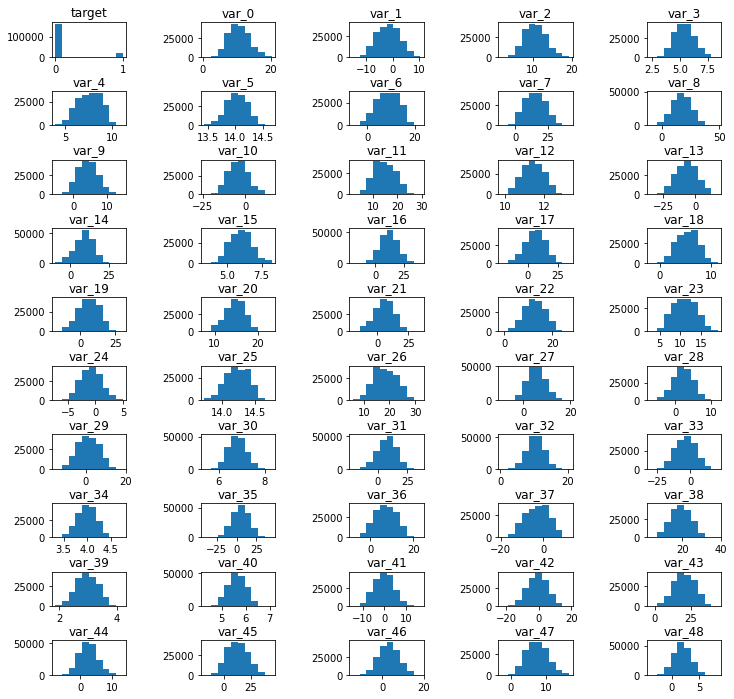

In [127]:
# TODO: overlay or figure out how to plot one row for each for comparison.

# Confirm distribution for all columns to note biases in the data.
fig, axs = plt.subplots(10,5, figsize = (12,12))
plt.subplots_adjust(wspace=1,hspace=1)

# All data
n = 0
for i in range(10): #loop rows
  for j in range(5): #loop cols
    col = train_data.columns[n]
    axs[i,j].hist(train_data[col])
    axs[i,j].set_title(col)
    n+=1

### Histograms - Successful Transactions

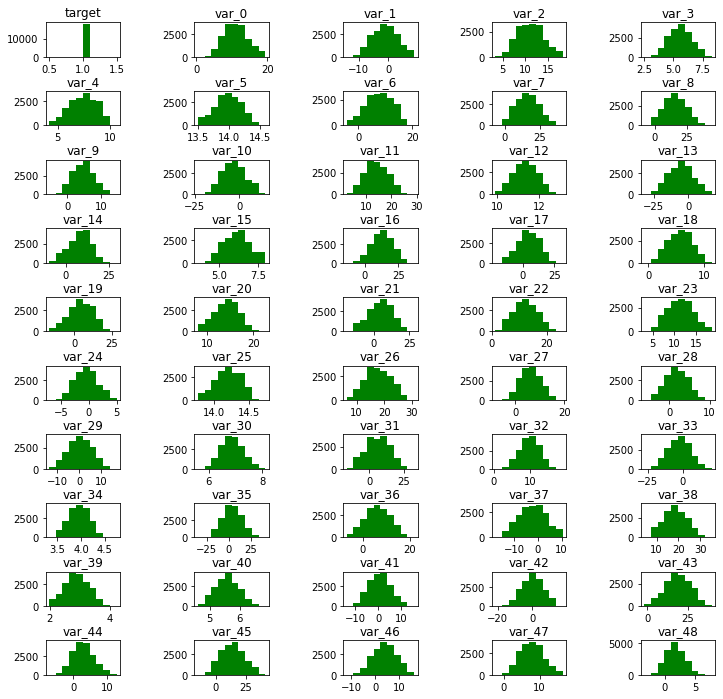

In [128]:
# Successful transactions
fig, axs = plt.subplots(10,5, figsize = (12,12))
plt.subplots_adjust(wspace=1,hspace=1)
n = 0
for i in range(10): #loop rows
  for j in range(5): #loop cols
    col = train_data_1.columns[n]
    axs[i,j].hist(train_data_1[col], color='green')
    axs[i,j].set_title(col)
    n+=1


### Histograms - Unsuccessful Transactions

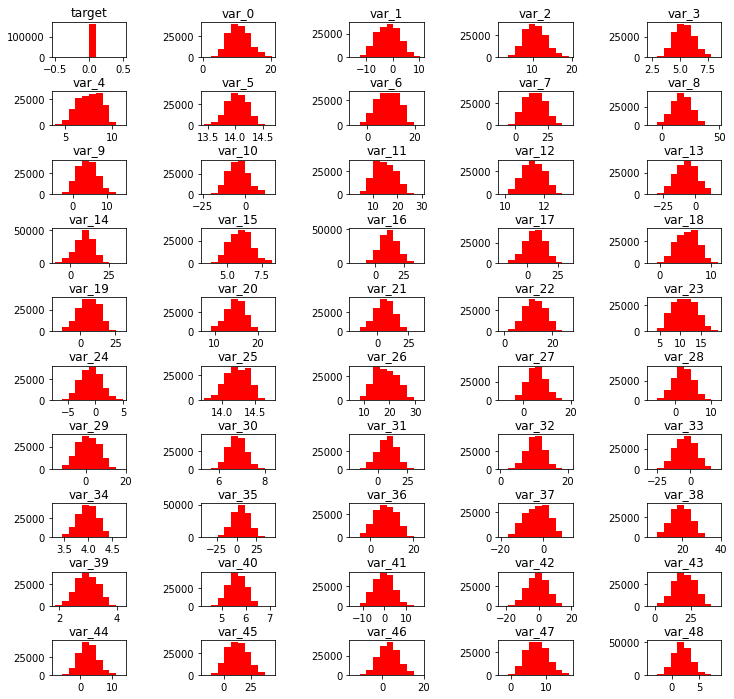

In [129]:
# Unsuccessful transactions
fig, axs = plt.subplots(10,5, figsize = (12,12))
plt.subplots_adjust(wspace=1,hspace=1)
n = 0
for i in range(10): #loop rows
  for j in range(5): #loop cols
    col = train_data_0.columns[n]
    axs[i,j].hist(train_data_0[col], color='red')
    axs[i,j].set_title(col)
    n+=1

## Verify target column values
Target values were verified to be a 1 (transaction occurred) or 0 (no transaction occurred. No cleanup is required on the target column as it contains only expected values.

Note that target data favored 0 - no transaction by a factor of 9:1.

In [130]:
# Verify that target column has only 1 and 0
train_data['target'].value_counts()

0    161960
1     18040
Name: target, dtype: int64

## Correlations
Correlations were plotted using a heatmap. Correlations were also plotted for sample sizes less than 1000 and values more 20000. Small sample sizes showed slightly more correlation. As sample sizes increased, data correlation decreased almost to zero indicating predictor variables show very little correlation. 

Correlating all variables with the target for the entire data set revealed very little correlation with all correlation values falling below 0.10.

### Heatmaps - All Data

Text(0.5, 1.0, '500 Data Points')

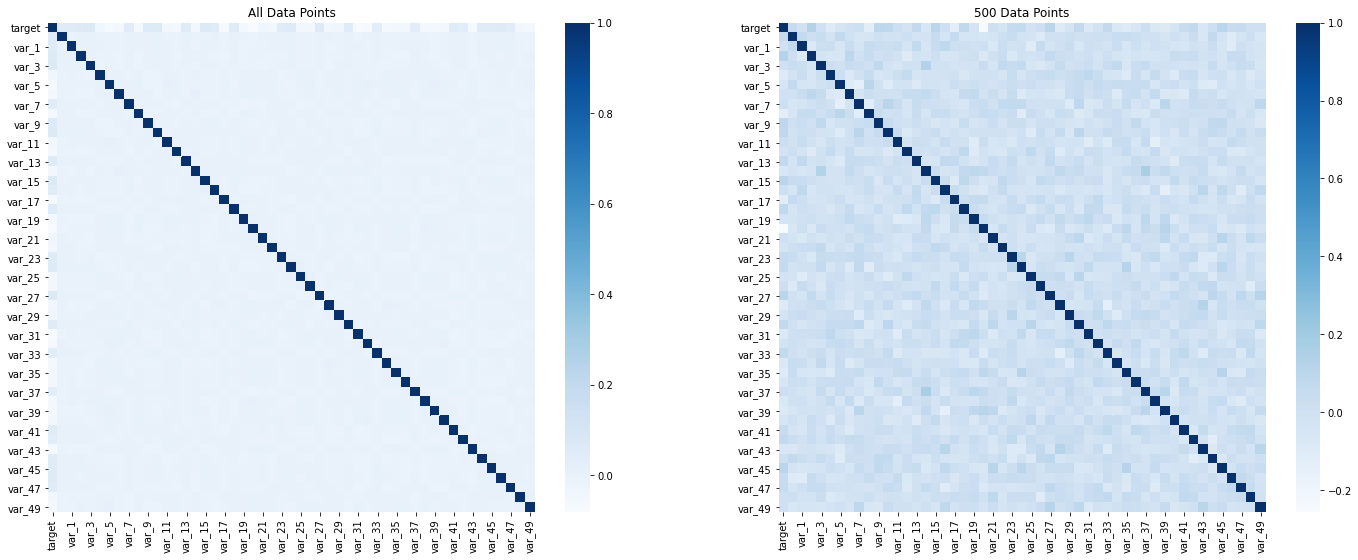

In [131]:
# Small sample sizes result in higher correlations. Larger sample sizes result in lower correlations.
color_all = 'Blues'
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (24,9))

corr = train_data.corr()
plt_full = sns.heatmap(corr, annot=False, cmap=color_all, ax=ax1)
plt_full.set_title('All Data Points')

points = 500
train_data_subset = train_data.sample(n = points, random_state = 10, axis=0)
corr_reduced = train_data_subset.corr()
plt_reduced = sns.heatmap(corr_reduced, annot=False, cmap=color_all, ax=ax2)
plt_reduced.set_title(f'{points} Data Points')

### Heatmaps - Successful Transactions

Text(0.5, 1.0, '500 Data Points')

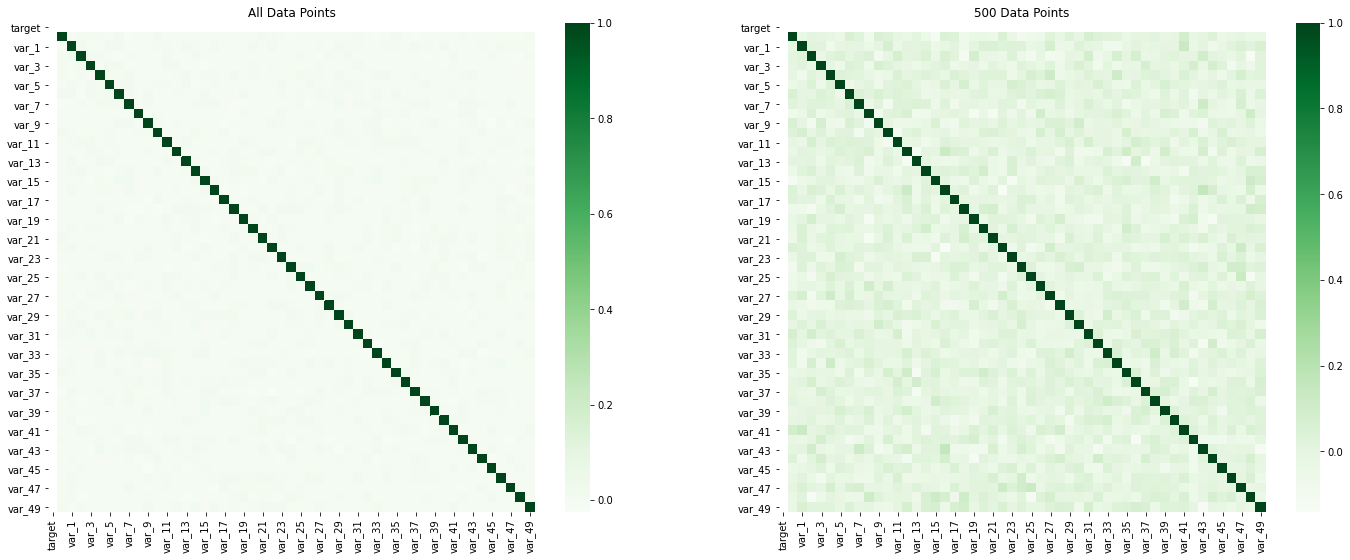

In [132]:
## Successful transactions
color_1 = 'Greens'
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (24,9))

corr_1 = train_data_1.corr()
plt_full_1 = sns.heatmap(corr_1, annot=False, cmap=color_1, ax=ax1)
plt_full_1.set_title('All Data Points')

points = 500
train_data_1_subset = train_data_1.sample(n = points, random_state = 10, axis=0)
corr_reduced_1 = train_data_1_subset.corr()
plt_reduced_1 = sns.heatmap(corr_reduced_1, annot=False, cmap=color_1, ax=ax2)
plt_reduced_1.set_title(f'{points} Data Points')

### Heatmaps - Unsuccessful Transactions

Text(0.5, 1.0, '500 Data Points')

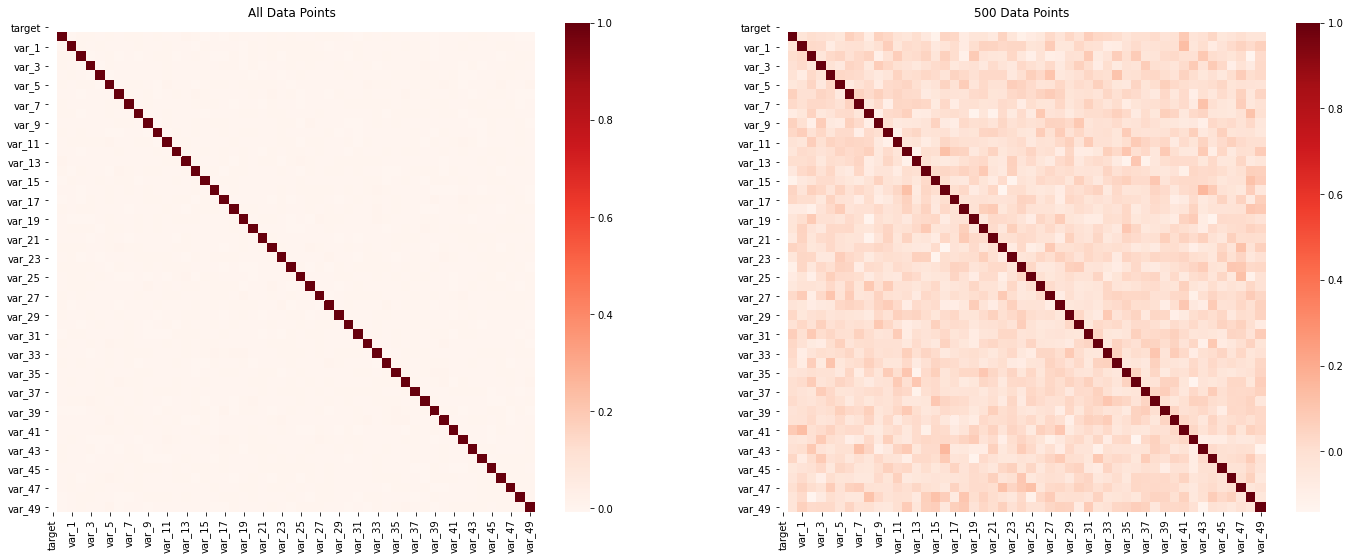

In [133]:
# Unsuccessful transactions
color_0 = 'Reds'
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (24,9))

corr_0 = train_data_0.corr()
plt_full_0 = sns.heatmap(corr_0, annot=False, cmap=color_0, ax=ax1)
plt_full_0.set_title('All Data Points')

points = 500
train_data_0_subset = train_data_0.sample(n = points, random_state = 10, axis=0)
corr_reduced_0 = train_data_1_subset.corr()
plt_reduced_0 = sns.heatmap(corr_reduced_0, annot=False, cmap=color_0, ax=ax2)
plt_reduced_0.set_title(f'{points} Data Points')

### Numerical Correlations

In [134]:
# All predictor variables are lower than .1 indicating a low correlation with the target

# All data
target_corr = train_data.corr()['target']
correlated_vars = abs(target_corr).sort_values(ascending=False)
correlated_vars

target    1.000000
var_20    0.080689
var_31    0.073296
var_5     0.070015
var_3     0.066924
var_27    0.064868
var_32    0.063871
var_10    0.063565
var_15    0.062887
var_43    0.061291
var_17    0.059906
var_24    0.059306
var_9     0.059227
var_8     0.057378
var_39    0.057373
var_19    0.057320
var_46    0.056902
var_38    0.055704
var_2     0.055450
var_6     0.054375
var_34    0.053733
var_0     0.052904
var_30    0.052457
var_12    0.052324
var_49    0.051718
var_44    0.051110
var_26    0.050278
var_40    0.050049
var_1     0.049916
var_28    0.049551
var_13    0.049072
var_14    0.048623
var_18    0.048392
var_35    0.048198
var_41    0.047948
var_23    0.047569
var_45    0.047543
var_25    0.047005
var_22    0.046433
var_11    0.045516
var_36    0.045513
var_47    0.045506
var_16    0.045281
var_7     0.044769
var_48    0.042765
var_4     0.042073
var_29    0.041987
var_42    0.041593
var_33    0.040520
var_21    0.040311
var_37    0.040147
Name: target, dtype: float64

# Data Processing


## Full Data with 90/10 Bias

### Create target/predictor df (90/10)

In [135]:
p_data = train_data[train_data.columns[~train_data.columns.isin(['target'])]]
p_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 50 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   var_0   180000 non-null  float64
 1   var_1   180000 non-null  float64
 2   var_2   180000 non-null  float64
 3   var_3   180000 non-null  float64
 4   var_4   180000 non-null  float64
 5   var_5   180000 non-null  float64
 6   var_6   180000 non-null  float64
 7   var_7   180000 non-null  float64
 8   var_8   180000 non-null  float64
 9   var_9   180000 non-null  float64
 10  var_10  180000 non-null  float64
 11  var_11  180000 non-null  float64
 12  var_12  180000 non-null  float64
 13  var_13  180000 non-null  float64
 14  var_14  180000 non-null  float64
 15  var_15  180000 non-null  float64
 16  var_16  180000 non-null  float64
 17  var_17  180000 non-null  float64
 18  var_18  180000 non-null  float64
 19  var_19  180000 non-null  float64
 20  var_20  180000 non-null  float64
 21  var_21  18

In [136]:
t_data = train_data['target']
#cannot do info() on this table for some reason - because one column?
# t_data.info()
t_data.describe()

count    180000.000000
mean          0.100222
std           0.300297
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: target, dtype: float64

### Define GNB Model (90/10)

In [137]:
# Create and fit model. t_data is target and is Y. p_data are predictors.
model = GaussianNB()
model.fit(p_data, t_data)

GaussianNB(priors=None, var_smoothing=1e-09)

### Confusion Matrix (90/10)
For both the confusion matrix and classification report, accuracy is reported at around 91%.

TODO: revisit this analysis

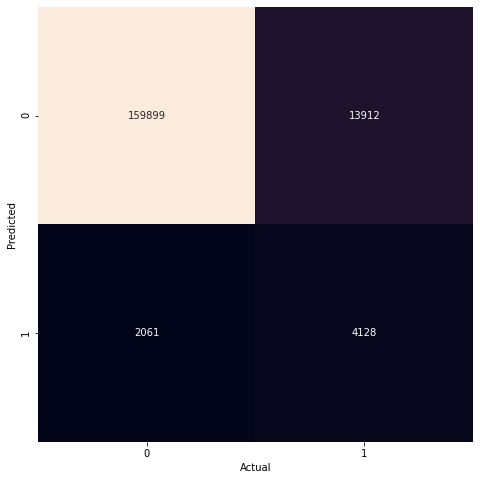

In [138]:
# True Positive | False Positive
# False Negativ | True Negative
predicted_y = model.predict(p_data)
plt.figure(figsize=(8,8))
mat = metrics.confusion_matrix(t_data,predicted_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels='01', yticklabels='01')
plt.xlabel('Actual')
plt.ylabel('Predicted');

In [139]:
# Get accuracy score from confusion matrix
metrics.accuracy_score(t_data, predicted_y)

0.9112611111111111

### Cross Validation (90/10)

Y = Target (target column)

X = Predictors (var_* columns)

Accuracy is 91% when using the full dataset that contains 90% unsuccessful transactions and 10% successful transactions.

In [140]:
# How accurate is our model? 
# Number of iterations - ran with 5, 10, 50, 100, 200 iterations. All produce around 91% accuracy
iterations = 200
results = np.zeros(iterations)

for idx in range(iterations):
  # get different train and test data sets for each iteration
  x_train, x_test, y_train, y_test = model_selection.train_test_split(p_data, t_data, test_size=0.25)
  # train the model
  model.fit(x_train, y_train)
  # get predictions from the model
  y_pred = model.predict(x_test)
  # verify accuracy of predictions
  results[idx] = metrics.accuracy_score(y_test,y_pred)

print(results.mean())

0.911193888888889


(array([ 2.,  6., 14., 50., 42., 43., 26., 15.,  1.,  1.]),
 array([0.90753333, 0.90831111, 0.90908889, 0.90986667, 0.91064444,
        0.91142222, 0.9122    , 0.91297778, 0.91375556, 0.91453333,
        0.91531111]),
 <a list of 10 Patch objects>)

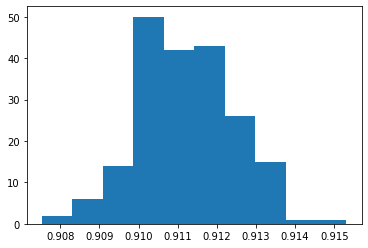

In [141]:
# more iterations with the training and testing data sets produce a smoother normal distribution.
plt.hist(results)

### Classification Report (90/10)

In [142]:
# classification_report?
# classification_report(y_true, y_pred, target_names)
classification_result = classification_report(t_data, predicted_y, target_names='01')
print(classification_result)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95    161960
           1       0.67      0.23      0.34     18040

    accuracy                           0.91    180000
   macro avg       0.79      0.61      0.65    180000
weighted avg       0.89      0.91      0.89    180000



## Reduced Data with 50/50

### Create target/predictor df 50/50



In [143]:
# Get random sample of unsuccessful transactions matching count of successful transactions
# so we have 50/50 split and remove skew in the data. Original data is skewed at 90% unsuccessful
# and 10% successful.
# 2nd column contains the value count.
no_transaction_count = train_data_1['target'].value_counts()[1]
train_data_0_reduced = train_data_0.sample(n = no_transaction_count, axis=0)
train_data_0_reduced.describe()

# Join reduced unsuccessful transactions with successful transactions
train_data_5050 = train_data_0_reduced.append(train_data_1)
train_data_5050.describe()

# Split into target and predictor dataframes
p_data_5050 = train_data_5050[train_data.columns[~train_data_5050.columns.isin(['target'])]]
t_data_5050 = train_data_5050['target']

### Define GNB Model (50/50)

In [144]:
model_5050 = GaussianNB()
model_5050.fit(p_data_5050, t_data_5050)

GaussianNB(priors=None, var_smoothing=1e-09)

### Confusion Matrix (50/50)

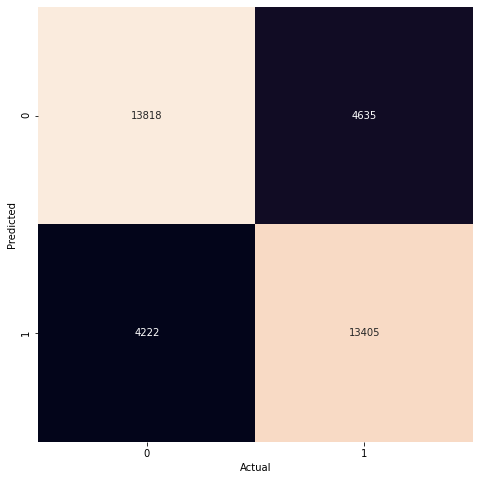

In [145]:
# TODO: analysis needed
predicted_y_5050 = model_5050.predict(p_data_5050)
plt.figure(figsize=(8,8))
mat_5050 = metrics.confusion_matrix(t_data_5050,predicted_y_5050)
sns.heatmap(mat_5050.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels='01', yticklabels='01')
plt.xlabel('Actual')
plt.ylabel('Predicted');

### Cross Validation (50/50)
Accuracy is **76%** using 50% unsuccessful / 50% successful transactions compared to **91%** when using the full data set with 90 unsuccessful / 10 successful transactions.

In [146]:
# How accurate is our model? 
# Number of iterations - ran with 5, 10, 50, 100, 200 iterations. All produce around 91% accuracy
iterations = 200
results_5050 = np.zeros(iterations)

for idx in range(iterations):
  # get different train and test data sets for each iteration
  x_train_5050, x_test_5050, y_train_5050, y_test_5050 = model_selection.train_test_split(p_data_5050, t_data_5050, test_size=0.25)
  # train the model
  model_5050.fit(x_train_5050, y_train_5050)
  # get predictions from the model
  y_pred_5050 = model_5050.predict(x_test_5050)
  # verify accuracy of predictions
  results_5050[idx] = metrics.accuracy_score(y_test_5050, y_pred_5050)

print(results_5050.mean())

0.7536008869179601


(array([ 4.,  8., 15., 34., 40., 39., 29., 20.,  7.,  4.]),
 array([0.74223947, 0.7445122 , 0.74678492, 0.74905765, 0.75133038,
        0.7536031 , 0.75587583, 0.75814856, 0.76042129, 0.76269401,
        0.76496674]),
 <a list of 10 Patch objects>)

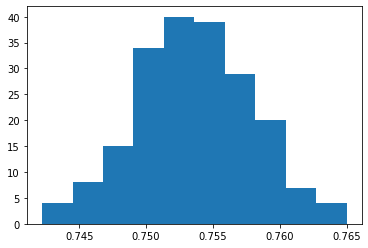

In [147]:
plt.hist(results_5050)

### Classification Report (50/50)


In [148]:
# classification_report?
# classification_report(y_true, y_pred, target_names)
classification_result_5050 = classification_report(t_data_5050, predicted_y_5050, target_names='01')
print(classification_result_5050)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76     18040
           1       0.76      0.74      0.75     18040

    accuracy                           0.75     36080
   macro avg       0.75      0.75      0.75     36080
weighted avg       0.75      0.75      0.75     36080



# Data Visualization




## Compare Confusion Matrices

Text(0.5, 1.0, '50/50')

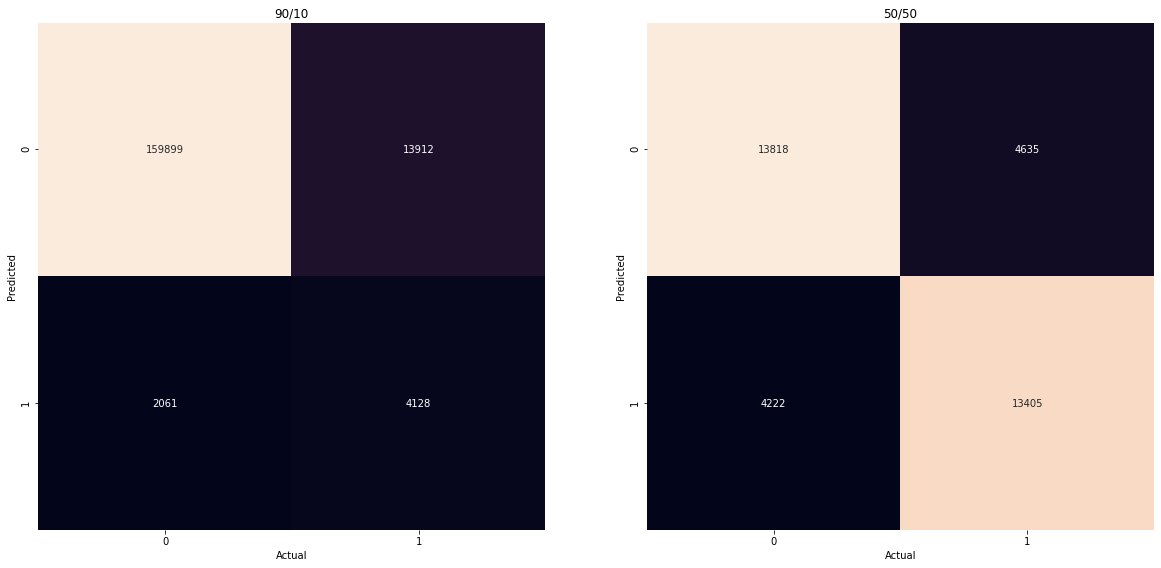

In [149]:
model = GaussianNB()
model.fit(p_data, t_data)
predicted_y = model.predict(p_data)

model_5050 = GaussianNB()
model_5050.fit(p_data_5050, t_data_5050)
predicted_y_5050 = model_5050.predict(p_data_5050)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,20))

mat = metrics.confusion_matrix(t_data,predicted_y)
plt_9010 = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels='01', yticklabels='01', ax=ax1)
plt_9010.set_xlabel('Actual')
plt_9010.set_ylabel('Predicted')
plt_9010.set_title('90/10')

mat_5050 = metrics.confusion_matrix(t_data_5050,predicted_y_5050)
plt_5050 = sns.heatmap(mat_5050.T, square=True, annot=True, fmt='d', cbar=False, xticklabels='01', yticklabels='01', ax=ax2)
plt_5050.set_xlabel('Actual')
plt_5050.set_ylabel('Predicted')
plt_5050.set_title('50/50')

## Compare Classification Reports


In [150]:
# classification_report(y_true, y_pred, target_names)
# https://www.delftstack.com/howto/python/python-bold-text/
# color tips 3x dark, 4x background, 9x bright
BOLD = '\033[1m'
DARKCYAN = '\033[36m'
PURPLE = '\033[35m'
print(DARKCYAN + BOLD)

print('Classification 90/10')
classification_result = classification_report(t_data, predicted_y, target_names='01')
print(classification_result)

print(PURPLE + '\n'*2)

print('Classification 50/50')
classification_result_5050 = classification_report(t_data_5050, predicted_y_5050, target_names='01')
print(classification_result_5050)


Classification 90/10
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    161960
           1       0.67      0.23      0.34     18040

    accuracy                           0.91    180000
   macro avg       0.79      0.61      0.65    180000
weighted avg       0.89      0.91      0.89    180000




Classification 50/50
              precision    recall  f1-score   support

           0       0.75      0.77      0.76     18040
           1       0.76      0.74      0.75     18040

    accuracy                           0.75     36080
   macro avg       0.75      0.75      0.75     36080
weighted avg       0.75      0.75      0.75     36080



# Conclusions and Recommendations

TODO: based on the results, we predict 

predicts one class but not the other

accuracy decreased ...

Based on the above analysis, conclusions:

* need more data
* another model may be needed to ....

helpful to know desired level of accuracy - unknown

